/Users/tonyxiang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (3,6,16,19,22,24,26,28,29,30,32,36,40,42,44,46,48,50,52,54,56,58,60,62,95,97,99,101,103,105,107,109,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


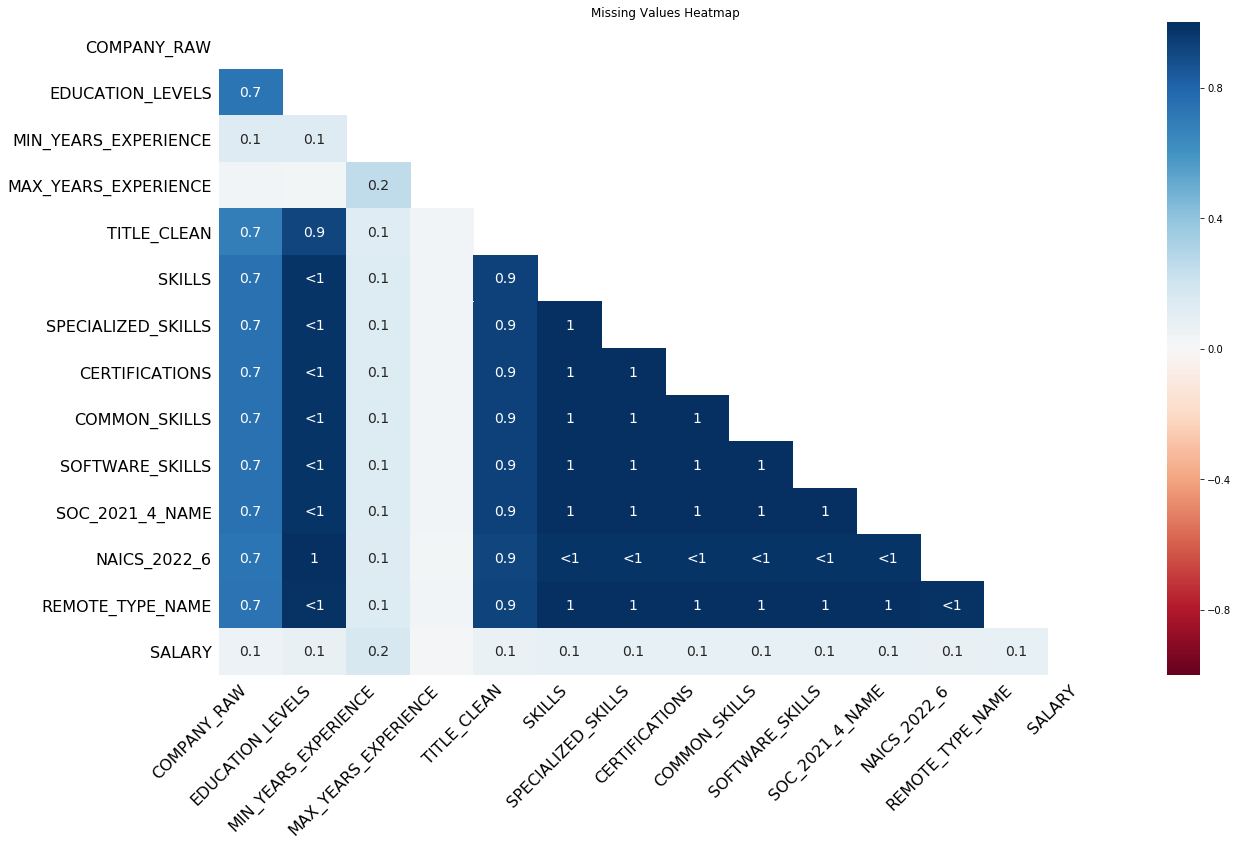

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

df = pd.read_csv("data/lightcast_job_postings.csv")

columns_to_keep = [
    'COMPANY_RAW',                # company
    'EDUCATION_LEVELS',           # education
    'MIN_YEARS_EXPERIENCE',
    'MAX_YEARS_EXPERIENCE',        # experience
    'TITLE_CLEAN',                # job title
    'SKILLS',                     # general skills
    'SPECIALIZED_SKILLS',        # specialized skills
    'CERTIFICATIONS',            # certifications
    'COMMON_SKILLS',             # common skills
    'SOFTWARE_SKILLS',           # software skills
    'SOC_2021_4_NAME',           # SOC 2021
    'NAICS_2022_6',              # NAICS 2022
    'REMOTE_TYPE_NAME',          # remote work type
    'SALARY'                     # salary (if present in your dataset)
]

df = df[columns_to_keep]


msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()





In [9]:
# Fill missing values
df["SALARY"].fillna(df["SALARY"].median(), inplace=True)
df["COMPANY"].fillna("Unknown", inplace=True)
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

df = df.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

# Fill numeric columns with mean
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum().sort_values(ascending=False).head(20))



KeyError: 'COMPANY'